<a href="https://colab.research.google.com/github/yuji-sgs/media-optimization/blob/main/page_stay_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに
## 本ノートブックの目的
**メディアを改善した際のページ滞在時間を定量的に評価し、効果検証していく**

In [1]:
# 必要なモジュールの読み込み
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm
import io
from google.colab import files
import urllib

## 特定のページを分析
分析記事：https://sgs-prog.com/swell-cafe-homepage-develop1/

### 改善前の事後分布

In [2]:
# Google Colaboratoryでファイルをアップロード
uploaded = files.upload()

Saving bquxjob_50563280_18c333dcce5.csv to bquxjob_50563280_18c333dcce5.csv


In [3]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['bquxjob_50563280_18c333dcce5.csv']))
df

,user_pseudo_id,page_location,stay_duration
0,1.057529e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,59
1,1.057529e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,80
2,1.316323e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,21
3,1.443935e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,28
4,3.801589e+08,https://sgs-prog.com/swell-cafe-homepage-devel...,91
...,...,...,...
429,1.181966e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,331
430,7.685114e+08,https://sgs-prog.com/swell-cafe-homepage-devel...,29
431,9.664378e+08,https://sgs-prog.com/swell-cafe-homepage-devel...,82
432,1.809486e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,132


In [4]:
df['stay_duration']

0       59
1       80
2       21
3       28
4       91
      ... 
429    331
430     29
431     82
432    132
433    224
Name: stay_duration, Length: 434, dtype: int64

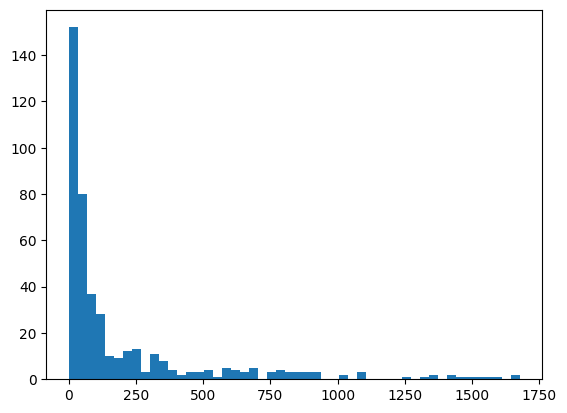

In [5]:
plt.hist(df['stay_duration'], bins=50)
plt.show()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


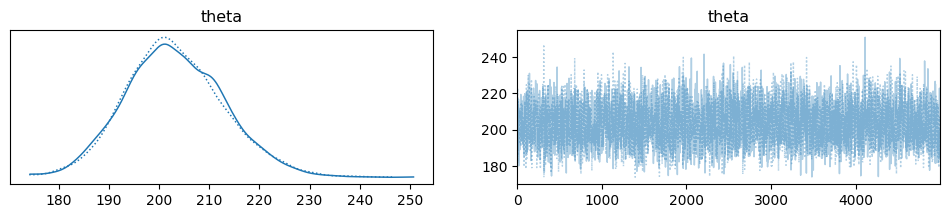

In [6]:
# 確率変数  𝜃  のサンプルの軌跡
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=3000)
  obs = pm.Exponential('obs', lam=1/theta, observed=df['stay_duration'])
  trace = pm.sample(5000, chains=2)
  pm.plot_trace(trace)

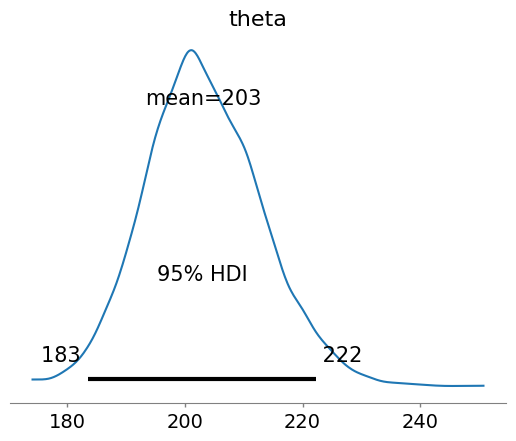

In [7]:
# 確率変数  𝜃  の事後分布
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)